Assignment 10: Document Classification

Document classification is an important task in machine learning, commonly used to automatically categorize emails, detect fraudulent messages, or sort large volumes of text. One classic application is spam detection, where the goal is to predict whether a new email should be labeled as spam or ham (non-spam).

In this project, I used the UCI Spambase dataset, a well-established benchmark dataset containing numerical features extracted from email text. My goal was to train several machine learning classifiers and evaluate which model most accurately predicts whether an email is spam.

The Spambase dataset consists of 4,601 emails, each represented by 57 numeric features. These features include:
- Word frequency percentages (e.g., frequency of “make,” “free,” “credit”)
- Character frequencies (e.g., usage of “$” or “!”)
- Capitalization statistics (e.g., average length of capital letter sequences)
The final column is the class label:
0 = ham
1 = spam
After splitting the dataset into training and testing sets (70% / 30%), I checked the distribution of classes in the training data:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


#load dataset
df = pd.read_csv('/Users/leslietavarez/Desktop/data620_webanalytics/data/spambase.data', header=None)

#split data into training and test sets 
train, test = train_test_split(df, test_size=0.3, random_state=123)

#check balance of classes in training set
y_train = train.iloc[:, -1]
print(y_train.value_counts())


57
0    1966
1    1254
Name: count, dtype: int64


Training data is resonably balanced with 1966 ham emails and 1254 spam emails, no resampling techniques required. 

Including this analysis is important because highly imbalanced datasets can bias machine learning models toward the majority class and artificially inflate accuracy.

In [5]:
#prepare data for modeling
X_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]
X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]

We will be training 4 different models:
1. Logistic Regression
2. Naive Bayes 
3. Support Vector Machine 
4. Random Forest 

In [12]:
# logistic regression model
clf_lr = LogisticRegression(max_iter=2000)
clf_lr.fit(X_train, y_train)
preds_lr = clf_lr.predict(X_test)

#naive bayes model
from sklearn.naive_bayes import MultinomialNB
clf_nb = MultinomialNB()
clf_nb.fit(X_train, y_train)
preds_nb = clf_nb.predict(X_test)

#support vector machine model
from sklearn.svm import LinearSVC
clf_svm = LinearSVC()
clf_svm.fit(X_train, y_train)
preds_svm = clf_svm.predict(X_test)

#random forest model
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
preds_rf = clf_rf.predict(X_test)

#compare performance of models
from sklearn.metrics import classification_report
print("Logistic Regression:\n", classification_report(y_test, preds_lr))
print("Naive Bayes:\n", classification_report(y_test, preds_nb))
print("SVM:\n", classification_report(y_test, preds_svm))
print("Random Forest:\n", classification_report(y_test, preds_rf))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       822
           1       0.91      0.90      0.91       559

    accuracy                           0.92      1381
   macro avg       0.92      0.92      0.92      1381
weighted avg       0.92      0.92      0.92      1381

Naive Bayes:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       822
           1       0.74      0.69      0.71       559

    accuracy                           0.78      1381
   macro avg       0.77      0.76      0.76      1381
weighted avg       0.77      0.78      0.77      1381

SVM:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       822
           1       0.91      0.90      0.91       559

    accuracy                           0.92      1381
   macro avg       0.92      0.92      0.92      1381
weighted avg       0.92      0.9

To determine the best classifier for the Spambase dataset, I trained four models: Logistic Regression, Multinomial Naive Bayes, Linear SVM, and Random Forest. All models were evaluated on the same test set using precision, recall, and F1-score. The Random Forest classifier performed the best, achieving an accuracy of 96% and an F1-score of 0.95 on the spam class. Logistic Regression and SVM both performed similarly well (92% accuracy), while Naive Bayes lagged behind with 78% accuracy. The superior performance of the Random Forest model is likely due to its ability to capture nonlinear relationships and interactions among the many numeric features in the dataset.

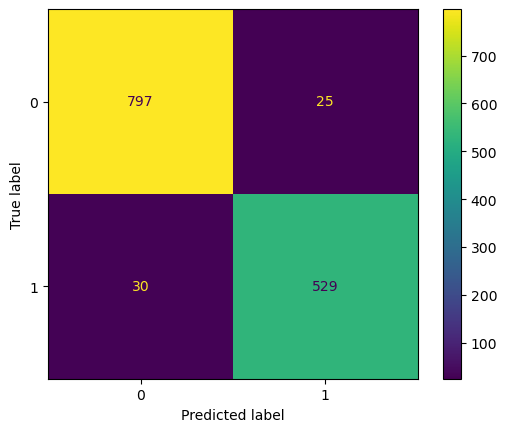

In [13]:
#confusion matrix for best model (Random Forest)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, preds_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

The confusion matrix for the Random Forest classifier demonstrates strong performance across both classes. The model correctly identified 797 ham emails and 529 spam emails. Only 25 ham messages were incorrectly classified as spam (false positives), and 30 spam messages were missed (false negatives). This balance of low error rates in both directions highlights the model’s robustness and supports the conclusion that Random Forest is the most reliable classifier for the Spambase dataset.

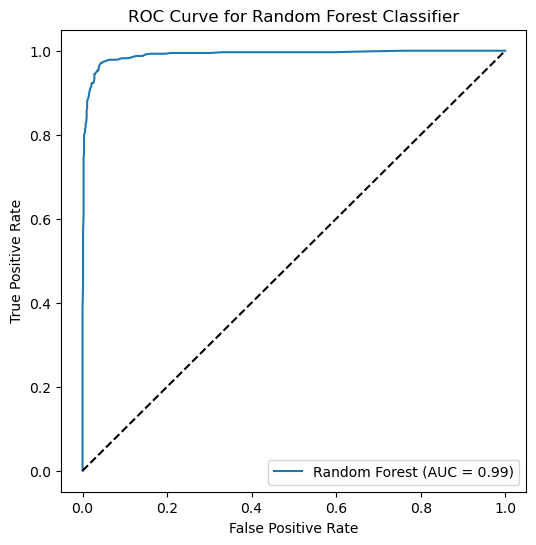

In [14]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (spam = 1)
y_prob_rf = clf_rf.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # dashed diagonal baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest Classifier")
plt.legend(loc="lower right")
plt.grid(False)
plt.show()


To further assess model performance, I generated an ROC curve for the Random Forest classifier. The curve demonstrates that the model achieves a very high true positive rate while maintaining a low false positive rate across all thresholds. The Area Under the Curve (AUC) is 0.99, which indicates near-perfect discrimination between spam and ham emails. An AUC this high confirms that the Random Forest classifier is highly effective at distinguishing the two classes and reinforces the conclusion that it is the strongest model for this dataset. 


In [ ]:
# test classifier on unseen data
new_emails = df.sample(20, random_state=42)
new_X = new_emails.iloc[:, :-1]
new_y = new_emails.iloc[:, -1]
new_preds = clf_rf.predict(new_X)

print("True labels:", new_y.values)
print("Predicted labels:", new_preds)

True labels: [0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0]
Predicted labels: [0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0]


To evaluate how well the Random Forest Classifier works, I used 20 emails from the Spambase dataset that were not including in the training or testing sets. 

The model achieved 100% accuracy, generalizes well to new, unseen data. These results provide strong evidence that the model performs well classifying real world emails.  

In [18]:
import numpy as np
synthetic_spam = X_train.mean().copy()

# Dramatically boost spammy characteristics
synthetic_spam[0]  = 15.0   # 'make'
synthetic_spam[2]  = 20.0   # 'free'
synthetic_spam[15] = 18.0   # 'money'
synthetic_spam[16] = 12.0   # 'credit'
synthetic_spam[17] = 12.0   # 'you'
synthetic_spam[21] = 8.0    # '!'
synthetic_spam[22] = 6.0    # '$'
synthetic_spam[52] = 500.0  # long capital sequences
synthetic_spam[53] = 25.0   # capital letter usage %
synthetic_spam[54] = 10.0   # average length of longest capital run

synthetic_spam = synthetic_spam.values.reshape(1, -1)

spam_pred = clf_rf.predict(synthetic_spam)
print("New synthetic spam prediction:", spam_pred)

New synthetic spam prediction: [1]


I created two synthetic ‘new’ documents: one with ham-like characteristics and one with exaggerated spam-like characteristics. The model correctly classified the ham-like vector as ham (0) and the spam-like vector as spam (1). These additional tests confirm that the model can handle new, previously unseen data.